In [1]:
# 3-1 데이터 불러오기


# 필요 라이브러리 호출하기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')

In [2]:
# 데이터 호출하기
entry_data = pd.read_csv('/aiffel/data/entry_data.csv')
sales_data = pd.read_csv('/aiffel/data/sales_data.csv')
item_data = pd.read_csv('/aiffel/data/item_data.csv')
item_entry_data = pd.read_csv('/aiffel/data/item_entry_data.csv')

plt.style.use('default')

In [3]:
# entry_data 데이터 정보 확인하기
entry_data.head()

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928


In [4]:
# sales_data 데이터 정보 확인하기
sales_data.head()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507


In [5]:
# item_data 데이터 정보 확인하기
item_data.head()

,구분,분류,상품명,판매금액
0,1,게임&TV,이어폰(커널형),"3,000원"
1,2,디저트,초코머핀,"3,500원"
2,3,디저트,쿠키(초코칩),"1,500원"
3,4,디저트,쿠키(마카다미아),"1,500원"
4,5,디저트,미니마카롱(3개),"2,000원"


In [6]:
# item_entry_data 데이터 정보 확인하기
item_entry_data.head()

,순위,분류,상품명,판매금액
0,1,한국대생,한국대생 요금제,"2,000원"
1,2,심야-조조,심야-조조 요금제,"5,000원"
2,3,일반인,일반요금제,"2,500원"
3,4,한국대생,한국대생 요금제,"2,500원"
4,5,일반인,일반요금제,"2,000원"


In [9]:
# 문제 1: 월별 매출액 추세
# 활용할 데이터(sales_data)를 temp_var로 정의하기
temp_var = sales_data.copy()

# temp_var의 date열을 만들고, sales_date의 결제일시 중 앞에서 7번째 값까지 할당
# 시각화시 잘 보이기 위해 앞의 2자리('20')도 잘라냄
temp_var['date'] = temp_var['결제일시'].str[2:7]

temp_var.head()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507,22-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507,22-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507,22-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507,22-04
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507,22-04


In [10]:
# sales_data의 결제금액에 포함된 쉼표(,) 지우기
temp_var['결제금액'] = temp_var['결제금액'].str.replace( ',', '' )

# sales_data의 결제금액을 숫자형태로 바꾸기
temp_var['결제금액'] = temp_var['결제금액'].astype( 'int64' )

# temp_var의 payment열을 date 기준으로 집계하기
payment_data = temp_var['결제금액'].groupby( temp_var['date'] ).sum()
payment_data = payment_data.to_frame().reset_index().rename( columns = {"date":"결제년월"} )

payment_data.head()

,결제년월,결제금액
0,21-02,7000
1,21-03,2104500
2,21-04,3116600
3,21-05,2537000
4,21-06,3621500


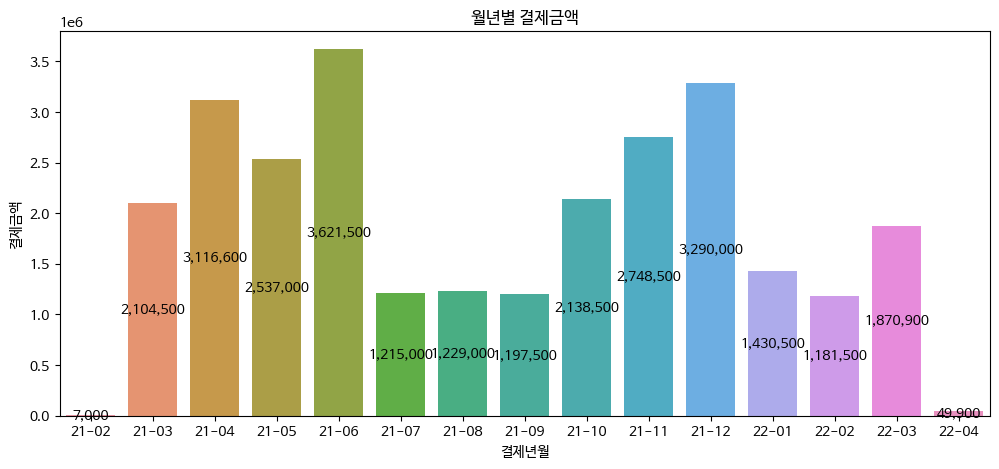

In [11]:
# 한글이 포함된 시각화를 위해 Matplotlib 설정
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager.findfont(font)


# 집계 결과를 시각화하기
plt.figure(figsize=(12,5))
ax = sns.barplot(data=payment_data, x='결제년월', y='결제금액')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('월년별 결제금액')
plt.show()

In [12]:
# 필수 문제2: 가장 인기 있는 음식/음료(sales_data를 이용합니다.)
# 여러 메뉴들(음식,음료)을 판매 개수 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화해봅니다.
# 힌트: value_counts() 함수를 사용하세요.
    
    
# 문제 2: 가장 인기 있는 음식/음료
# temp_var의 상품명을 value_counts를 이용해 집계하기
# 주의! value_counts로 바로 집계하면 판매취소와 결제취소가 함께 집계됩니다.
# 따라서 '판매수량' 칼럼 값이 '-1'인 데이터를 제외하고 집계해야 합니다.
# 힌트 코드 : temp_var[temp_var['판매수량']==-1]

#
real_sales_data = temp_var[temp_var['판매수량']==1]

# 집계 결과를 데이터프레임으로 변환하고, 상위 10개 선정하기
items_count = real_sales_data['상품명'].value_counts().to_frame()
items_count = items_count.reset_index().rename(columns = {"index":"상품명","상품명":"판매수량"}).head(10)

items_count.head()

,상품명,판매수량
0,김치볶음밥,1204
1,라면,749
2,짜장라면,455
3,치즈불고기볶음밥,420
4,계란추가,314


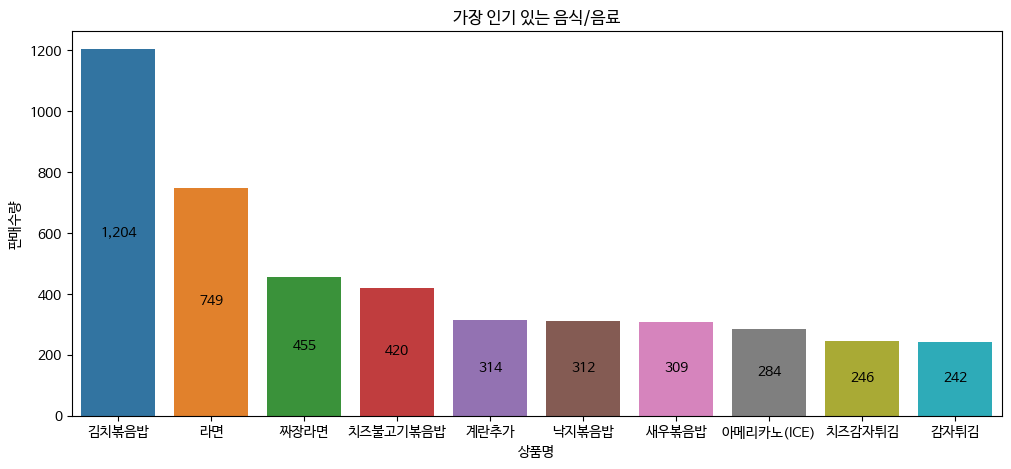

In [13]:
# 집계 결과를 시각화하기
plt.figure(figsize=(12,5))
ax = sns.barplot(data=items_count, x='상품명', y='판매수량')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('가장 인기 있는 음식/음료')
plt.show()

In [14]:
# 여러 메뉴들(음식,음료)을 판매 매출(판매 개수 x 결제 금액) 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화해봅니다.
# 힌트: value_counts() 함수를 사용하세요.


# temp_var의 payment열을 상품명을 기준으로 집계하기
items_payment = real_sales_data['결제금액'].groupby(real_sales_data['상품명']).sum()

# item_payment의 값을 내림차순으로 정렬하고 상위 10개 도출하기
items_payment = items_payment.reset_index().rename(columns = {"index":"상품명"})
items_payment = items_payment.sort_values(by=['결제금액'], ascending=False)
items_payment = items_payment.reset_index().head(10)

items_payment.head()

,index,상품명,결제금액
0,13,김치볶음밥,6004400
1,23,라면,2941500
2,73,치즈불고기볶음밥,2292600
3,62,짜장라면,2038500
4,14,낙지볶음밥,1710700


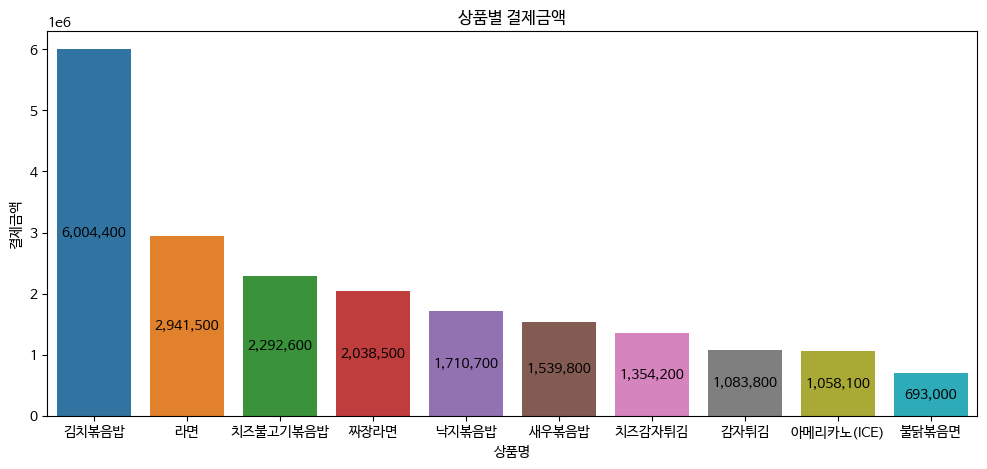

In [15]:
# 집계 결과 시각화하기
plt.figure(figsize=(12,5))
ax = sns.barplot(data=items_payment, x='상품명', y='결제금액')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('상품별 결제금액')
plt.show()

In [16]:
# 필수 문제3: 가장 많이 팔린 입장권 종류(entry_data를 이용합니다.)
# 여러 입장권 종류를 판매 매출(판매 개수 x 금액) 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화해봅니다.
# 힌트: value_counts() 함수를 사용하세요.


# 문제 3: 가장 많이 팔린 입장권 종류
# 활용할 데이터(entry_data)를 temp_var로 정의하기
temp_var = entry_data

# temp_var의 금액을 숫자형태로 변환하기
# 이미 숫자형태로 되어 있었음
#temp_var['금액'] = temp_var['금액'].str.replace(',','').astype('int64')

# temp_var의 금액을 요금제명을 기준으로 집계하기
entry_payment = temp_var['금액'].groupby(temp_var['요금제명']).sum()

# tickets의 값을 내림차순으로 정렬하고 상위 10개 도출하기
entry_payment = entry_payment.reset_index().rename(columns = {"index":"요금제명"})
entry_payment = entry_payment.sort_values(by=['금액'], ascending=False)
entry_payment = entry_payment.reset_index().head(10)

entry_payment.head()

,index,요금제명,금액
0,21,한국대생 입장권(종일권),70037000
1,17,입장권(종일권),23570500
2,15,심야-조조무제한(06시까지),11600000
3,14,심야-조조무제한,6221000
4,20,한국대생 무제한 입장권,5207500


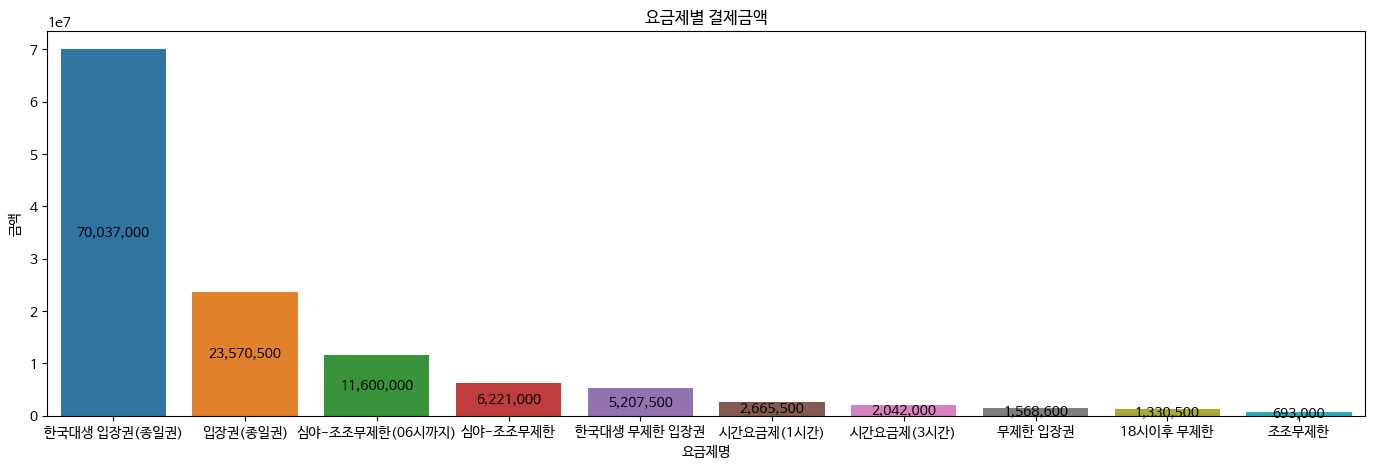

In [17]:
# 집계 결과 시각화하기
plt.figure(figsize=(17,5))
ax = sns.barplot(data=entry_payment, x='요금제명', y='금액')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('요금제별 결제금액')
plt.show()

# 내가 정의한 문제 해결하기

In [20]:
# 내 Key Question을 중심으로 다양한 분석을 진행해봅시다.
####################################
## 이용시간과 상품구매금액과의 관계 ##
####################################

# Step 1. 고객별 이용시간 합계 데이터프레임 만들기 
temp_var = entry_data.copy()

# 입실과 퇴실의 데이터타입을 datetime64으로 바꿔줌
temp_var['입실'] = temp_var['입실'].astype('datetime64')
temp_var['퇴실'] = temp_var['퇴실'].astype('datetime64')

# 이용시간 열을 새로 만들어 퇴실-입실의 값을 숫자형태로 넣어줌 
temp_var['이용시간'] = ( temp_var['퇴실'] - temp_var['입실'] ) / pd.Timedelta(hours=1)

# 고객별 총 이용시간을 groupby로 집계해서 데이터프레임 생성
entry_sum = temp_var['이용시간'].groupby( temp_var['고객'] ).sum().to_frame().reset_index().rename( columns = {"index":"고객"} )

entry_sum.head()

,고객,이용시간
0,customer,23.783333
1,customer010407,4.950000
2,customer014003,16.900000
3,customer014109,1.333333
4,customer016604,10.800000


In [21]:
# Step 2. sales_data를 사용해서 고객별 결제금액 합계 데이터프레임 만들기

# 활용할 데이터(sales_data)를 temp_var로 정의하기
temp_var = sales_data.copy()

# sales_data의 결제금액에 포함된 쉼표(,) 지우기
temp_var['결제금액'] = temp_var['결제금액'].str.replace( ',', '' )

# sales_data의 결제금액을 숫자형태로 바꾸기
temp_var['결제금액'] = temp_var['결제금액'].astype( 'int64' )

# 고객별 결제금액의 합을 groupby로 집계해서 데이터프레임 생성
sales_sum = temp_var['결제금액'].groupby( sales_data['고객'] ).sum().to_frame().reset_index().rename( columns = {"index":"고객"} )

sales_sum.head()

,고객,결제금액
0,customer016004,4000
1,customer111111,8000
2,customer200167,9000
3,customer200188,8500
4,customer200285,52000


In [22]:
# step 3. 앞에서 만든 두 데이터프레임을 '고객'칼럼을 기준으로 합해서 데이터프레임 생성
entry_sales_sum = pd.merge( entry_sum, sales_sum, how='outer', on='고객' ).fillna(0)

entry_sales_sum.head()

,고객,이용시간,결제금액
0,customer,23.783333,0.0
1,customer010407,4.950000,0.0
2,customer014003,16.900000,0.0
3,customer014109,1.333333,0.0
4,customer016604,10.800000,0.0


In [24]:
# 이용시간이 제일 긴 top 20 고객들을 데이터프레임 
entry_vip = entry_sales_sum.sort_values( by='이용시간', ascending=False ).head(20).reset_index(drop=True)

entry_vip.head()

,고객,이용시간,결제금액
0,customer440840,1077.666667,35000.0
1,customer667032,981.366667,263500.0
2,customer229550,802.200000,24500.0
3,customer666446,747.666667,0.0
4,customer300766,699.733333,6000.0


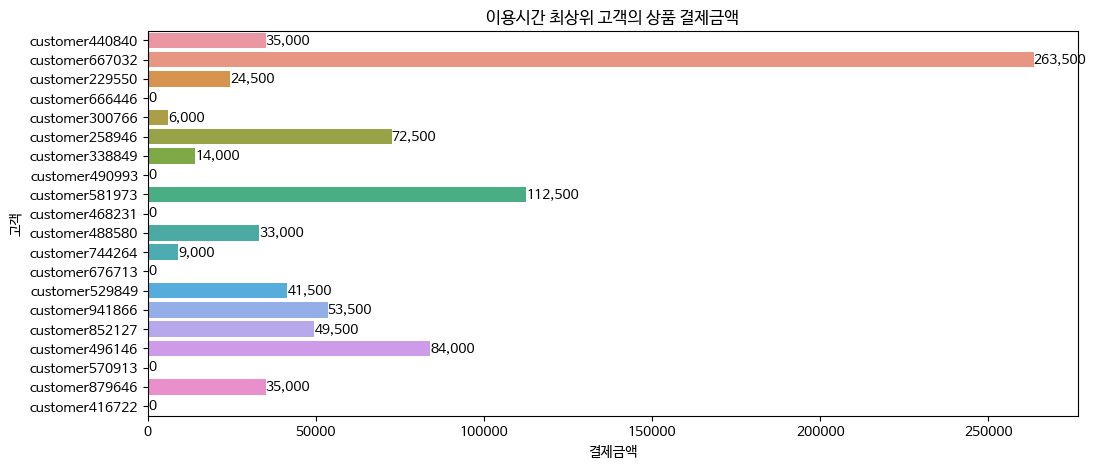

In [25]:
# 막대그래프 시각화
plt.figure(figsize=(12,5))
ax = sns.barplot(data=entry_vip, x='결제금액', y='고객')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues])
plt.title('이용시간 최상위 고객의 상품 결제금액')
# plt.xticks(rotation=45)
plt.show()

In [26]:
# 상품 결제금액이 제일 많은 top 20 고객들을 데이터프레임 
sales_vip = entry_sales_sum.sort_values( by='결제금액', ascending=False ).head(20).reset_index(drop=True)

sales_vip.head()

,고객,이용시간,결제금액
0,customer667032,981.366667,263500.0
1,customer499864,0.000000,151300.0
2,customer977070,130.016667,128800.0
3,customer859632,52.366667,118500.0
4,customer581973,476.633333,112500.0


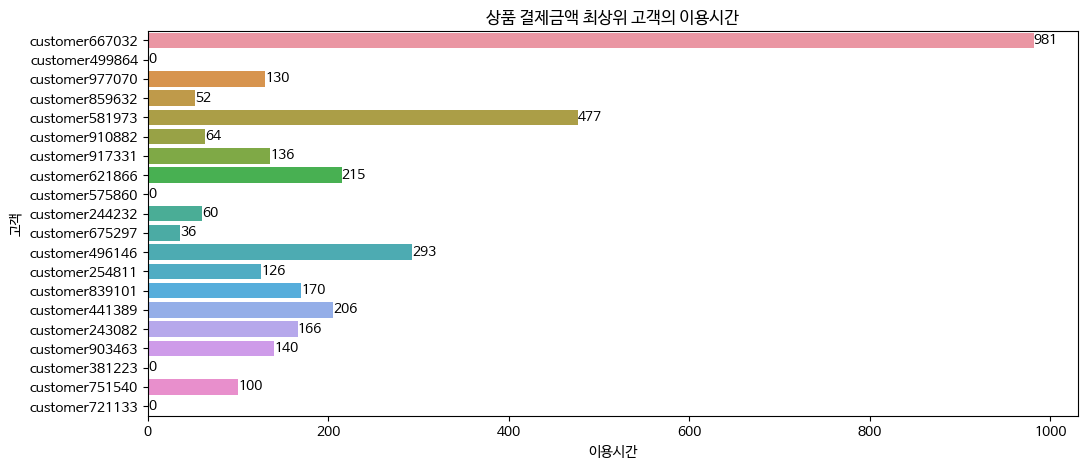

In [27]:
# 막대그래프 시각화
plt.figure(figsize=(12,5))
ax = sns.barplot(data=sales_vip, x='이용시간', y='고객')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues])
plt.title('상품 결제금액 최상위 고객의 이용시간')
# plt.xticks(rotation=45)
plt.show()

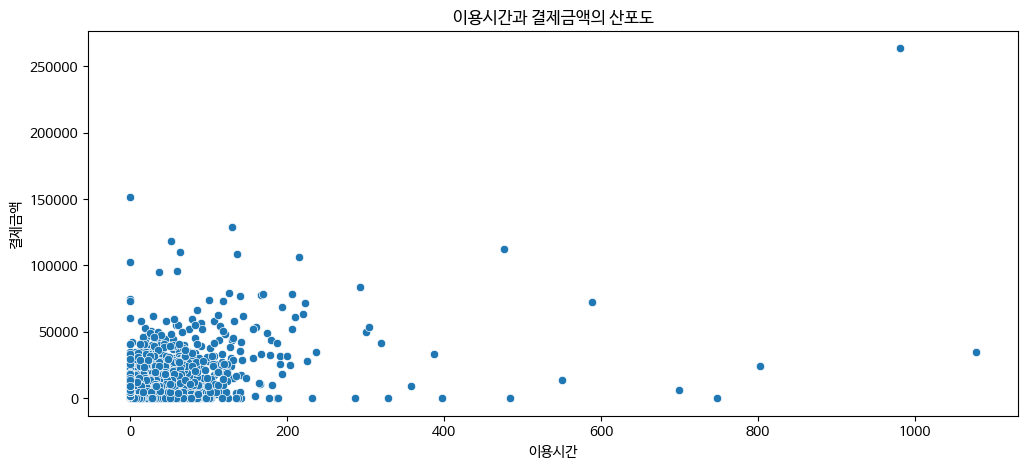

In [28]:
# 이용시간과 결제금액을 기준으로 산포도(scatter) 그리기
plt.figure(figsize=(12,5))
sns.scatterplot(data=entry_sales_sum, x='이용시간', y='결제금액')
plt.title('이용시간과 결제금액의 산포도')
plt.show()

# 회고

1. sales_data에서 중복 데이터 문제로 고민이 있었다.
행 전체가 동일해서 뺄가 했지만 입실시간은 약간씩 다른데 퇴실시간이 같은 행을 발견하고는 오류로 중복이 생기는 것 같지는 않다는 생각이 들었다. 한 아이디로 중복 입실, 퇴실 처리를 하는 것으로 생각되어 삭제하지 않기로 했다.
     
2. 시각화 중에 그래프의 크기가 작게 표현되어 문자가 잘리는 경우가 있었는데 그래프의 크기를 조절하는 함수를 통해 그래프도 예뻐지고 문자도 잘리지 않고 잘 표현되었다.

3. timedelta형의 데이터를 숫자로 변환해주는 방법을 통해 이용시간과 결제금액의 상관 관계를 비교적 간편하게 표현할 수 있었다.
     
4. 결론
이용시간과 결제금액의 산포도에 보이듯이 이용시간이 길어져도 결제금액은 비례해서 증가하지 않는다.
이용시간은 200시간 미만, 결제금액은 5만원 미만에 대다수 밀집해 있다.

5. 솔루션
솔직히, 명확한 솔루션을 제시하기가 어렵다. 하지만 나름 단순하게 제안을 하자면 이용시간이 일정시간을 초과할때 시간대(식사, 그 외)에 따라 타임 할인 쿠폰(식사시간에는 밥류, 그외 시간에는 음료)을 발행해서 이용시간이 긴 고객에게 상품 결제를 유도하면 어떨까 한다.

# 팀원들과 논의했던 주제들

1.	2021 3월-6월은 성수기, 2022 3월-6월은 성수기임에도 매출이 낮다
왜?

2.	RFM 분석으로 vip 고객
→ 회원과 비회원으로 나눠보기
→ 회원중에서 vip를 뽑는걸로
→ 월마다 vip가 달라질수도
→ vip를 추출할 때 일정기간을 두고
→ 시간만 오래 있는 사람이 vip인지, 짧게 있어도 많이 먹고, 자주 오는 사람이 vip인지

3.	오래 있으면 음식을 많이 먹을까?
→ 여러분은 스터디카페에 가면 많이 드시나요?
→ 스터디 카페 vip는 음식을 많이 먹을까요?
→ 비중이 어떻게 될거 같으냐
→ 시간대와 연결
→ 시간대별 많이 팔리는 음식 , 예를 들어 12-2시 이렇게 시간 정해주기
→ entry_data 시간대별 입장 데이터

4.	최근에 제일 잘 팔린거, 안 팔린거 정해서 안 팔리는 메뉴 정리
→ 결론은 볶음밥 종류를 늘리는걸로..

5.	요금제를 한국대생/일반인 나눴는데 효과가 있는지
→ entry_data를 활용해서 요금제의 변화를 추적하면…?

•	분류
item_data 메뉴 정리할 때..? 디저트/음식…
entry_data 입장시간에 대한 분류
item_entry_data 시간대에 대한 분류 가능